In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Wgrywanie danych
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',sep=',')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# DOstosowywujemy dane do póxniejszych obliczeń
data.drop(['Person ID', 'Occupation'], axis=1, inplace=True)
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
data['BMI Category'] = data['BMI Category'].replace('Normal', 0)
data['BMI Category'] = data['BMI Category'].replace('Overweight', 1)
data['BMI Category'] = data['BMI Category'].replace('Obese', 2)


# Podział kolumny "Blood Pressure"
data[['Blood High', 'Blood Low']] = data['Blood Pressure'].str.split('/', expand = True)
# Usunięcie oryginalnej kolumny "Blood Pressure"
data.drop('Blood Pressure', axis = 1, inplace=True)

dummies = pd.get_dummies(data['Sleep Disorder'])
data['Sleep Disorder'] = data['Sleep Disorder'].replace('Sleep Apnea', int(1))
data['Sleep Disorder'] = data['Sleep Disorder'].replace('Insomnia', int(1))
data['Sleep Disorder'] = data['Sleep Disorder'].fillna(int(0))

data['Gender'] = data['Gender'].replace('Male', 0)
data['Gender'] = data['Gender'].replace('Female', 1)

data['is_female'] = (data['Gender'] == 1).astype(int)
data['is_Male']   = (data['Gender'] == 0).astype(int)
data.drop('Gender', axis = 1, inplace = True)


data = data.apply(pd.to_numeric, errors = 'coerce')
data.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood High,Blood Low,is_female,is_Male
0,27,6.1,6,42,6,1,77,4200,0.0,126,83,0,1
1,28,6.2,6,60,8,0,75,10000,0.0,125,80,0,1
2,28,6.2,6,60,8,0,75,10000,0.0,125,80,0,1
3,28,5.9,4,30,8,2,85,3000,1.0,140,90,0,1
4,28,5.9,4,30,8,2,85,3000,1.0,140,90,0,1


Nr.1, Wartość o najmniejszym wpływie na R^2: Daily Steps, Wartość R^2 w modelu: 0.9662
Nr.2, Wartość o najmniejszym wpływie na R^2: Physical Activity Level, Wartość R^2 w modelu: 0.9663
Nr.3, Wartość o najmniejszym wpływie na R^2: Heart Rate, Wartość R^2 w modelu: 0.9688
Nr.4, Wartość o najmniejszym wpływie na R^2: Blood High, Wartość R^2 w modelu: 0.963
Nr.5, Wartość o najmniejszym wpływie na R^2: Blood Low, Wartość R^2 w modelu: 0.965
Nr.6, Wartość o najmniejszym wpływie na R^2: Age, Wartość R^2 w modelu: 0.9596
Nr.7, Wartość o najmniejszym wpływie na R^2: Sleep Disorder, Wartość R^2 w modelu: 0.9219
Nr.8, Wartość o najmniejszym wpływie na R^2: is_female, Wartość R^2 w modelu: 0.922
Nr.9, Wartość o najmniejszym wpływie na R^2: is_Male, Wartość R^2 w modelu: 0.922
Nr.10, Wartość o najmniejszym wpływie na R^2: BMI Category, Wartość R^2 w modelu: 0.921
Nr.11, Wartość o najmniejszym wpływie na R^2: Stress Level, Wartość R^2 w modelu: 0.9048
Nr.12, Wartość o najmniejszym wpływie na R^2: S

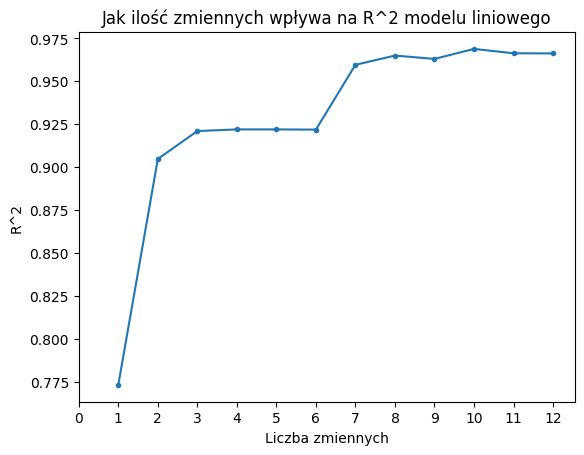

In [4]:
# Analiza dopasowania modelu w zależności od uwzględnionych zmiennych
X = data.drop('Quality of Sleep', axis = 1)
Y = data['Quality of Sleep']

R2_list = []
counter = 1
#while len(X.columns) >= 1:
while X.shape[1] > 0:
    # trenujemy model liniowy
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Używam wydzielonych zmiennych aby sprawdzić jak radzi sobie nasz model
    y_pred = model.predict(X_test)
    # obliczamy R^2
    r2 = r2_score(y_test, y_pred)
    # dodajemy wartość R^2 do listy
    R2_list.append(r2)
    # sprawdzamy korelacje każdej zmiennej z jakością snu
    Correlations = [abs(model.coef_[x]) for x in range(len(model.coef_))]
    # znajdujemy najsłabszą korelację
    weakest_variable = Correlations.index(min(Correlations))
    # znajdujemy zmienną z najsłabszą korelacją
    To_Remove = X.columns[weakest_variable]
    # wyświetlamy historię usuwania zmiennych
    print(f'Nr.{counter}, Wartość o najmniejszym wpływie na R^2: {To_Remove}, Wartość R^2 w modelu: {r2:.4g}')
    counter += 1
    # usuwamy zmienną z najsłabszą korelacją cząstkową 
    X = X.drop(To_Remove, axis=1)
# aby wykres miał odpowiednią kolejność, musimy odwrócić listę
R2_list = R2_list[::-1]
plt.figure()
plt.plot(range(1, len(R2_list) + 1), R2_list,marker = '.')
plt.xticks(np.arange(0,13))
plt.xlabel('Liczba zmiennych')
plt.ylabel('R^2')
plt.title('Jak ilość zmiennych wpływa na R^2 modelu liniowego')
plt.show()

In [5]:
# Model liniowy do wyszukiwania, czy dana osoba może zachorować na zaburzenie snu
# przygotowywujemy dane do modelu o zaburzeniu snu
X = data.drop('Sleep Disorder', axis = 1)
Y = data['Sleep Disorder']

# tutaj wykorzystam train_test_split gdyż będę chciał zobaczyć póxniej jak radzi sobie nasz model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# podobnie jak w przypadku OLS, tworzymy model i dopasowywujemy do niego nasze dane
model = LinearRegression()
model.fit(X_train, y_train)
# Używam wydzielonych zmiennych aby sprawdzić jak radzi sobie nasz model
y_pred = model.predict(X_test)
# zmieniam na wartości 1 lub 0. probujemy rozwiązac problem klasyfikacyjny za pomocą regresji liniowej w końcu.
y_pred = (y_pred >= 0.5).astype(int)
# mając dane do treningu oraz do predykcji, sprawdzam wskaźnik MSE oraz R^2. Wyświetlam wyniki
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'MSE: {MSE}')
print(f'R^2: {R2}')

# Print coefficients and corresponding variables
coefficients = model.coef_
variable_names = X.columns

for variable, coefficient in zip(variable_names, coefficients):
    print(f'{variable}: {coefficient}')

MSE: 0.02631578947368421
R^2: 0.8782051282051282
Age: 0.016422807249382432
Sleep Duration: -0.050191805654927195
Quality of Sleep: -0.16879584782593798
Physical Activity Level: 0.0006629823327667422
Stress Level: -0.042801011692125926
BMI Category: 0.27328730676216384
Heart Rate: -0.0027959795348811863
Daily Steps: -4.069738758054331e-05
Blood High: -0.03285424972190984
Blood Low: 0.06277033791241557
is_female: -0.0014625511734883666
is_Male: 0.0014625511734885498
